# Initialize Libraries

For the purposes of our Project, our group decided to apply a clustering model to our dataset. As the dataset comprises of both numerical and categorical data, we needed to use a model that could handle both types of data such as K-Prototypes

Note: You may need to install kmodes if it is not already installed

In [1]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from kmodes.kprototypes import KPrototypes

## Loading in dataset

We will be using the dataset duped_data.csv that was generated after the data cleaning process.

In [4]:
restaurant_data = pd.read_csv('duped_data.csv')
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3772 non-null   int64  
 1   id              3772 non-null   int64  
 2   name            3772 non-null   object 
 3   street_address  3772 non-null   object 
 4   price           3772 non-null   object 
 5   cuisine         3772 non-null   object 
 6   rating          3772 non-null   float64
 7   latitude        3772 non-null   float64
 8   longitude       3772 non-null   float64
 9   price_mid       3772 non-null   float64
 10  cuisine_cat     3772 non-null   int64  
 11  duplicate       3772 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 353.8+ KB


## Data Reformatting

Before applying the K.Prototype model onto the dataset, reformatting needs to be done.   

In particular the following categorical columns:   
**'rating'** will be converted from **float** to **object** type   
**'cuisine_cat'** will be converted from **int** to **object** type

In [5]:
restaurant_data['cuisine_cat'] = restaurant_data['cuisine_cat'].astype(str)
restaurant_data['rating'] = restaurant_data['rating'].astype(str)
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3772 non-null   int64  
 1   id              3772 non-null   int64  
 2   name            3772 non-null   object 
 3   street_address  3772 non-null   object 
 4   price           3772 non-null   object 
 5   cuisine         3772 non-null   object 
 6   rating          3772 non-null   object 
 7   latitude        3772 non-null   float64
 8   longitude       3772 non-null   float64
 9   price_mid       3772 non-null   float64
 10  cuisine_cat     3772 non-null   object 
 11  duplicate       3772 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 353.8+ KB


In [6]:
restaurant_data.select_dtypes('object').nunique()

name              2194
street_address    2717
price                8
cuisine            189
rating               7
cuisine_cat         52
dtype: int64

### Creating a new Dataframe

Creation of a new dataframe containing all values relevant to the clustering algorithm   

In [7]:
df_K = restaurant_data[['rating','cuisine_cat','latitude','longitude','price_mid']]

Converting the dataframe to an array to be fed into the K.Prototype model

In [8]:
smart_array = df_K.values

smart_array[:, 2] = smart_array[:,2].astype(float)
smart_array[:, 3] = smart_array[:,3].astype(float)
smart_array[:, 4] = smart_array[:,4].astype(float)

categorical_index = list(range(0,1))

### Plotting the Elbow Curve

Below, we will plot the elbow curve graph to find the optimal number of clusters to be applied to the K.Prototypes model

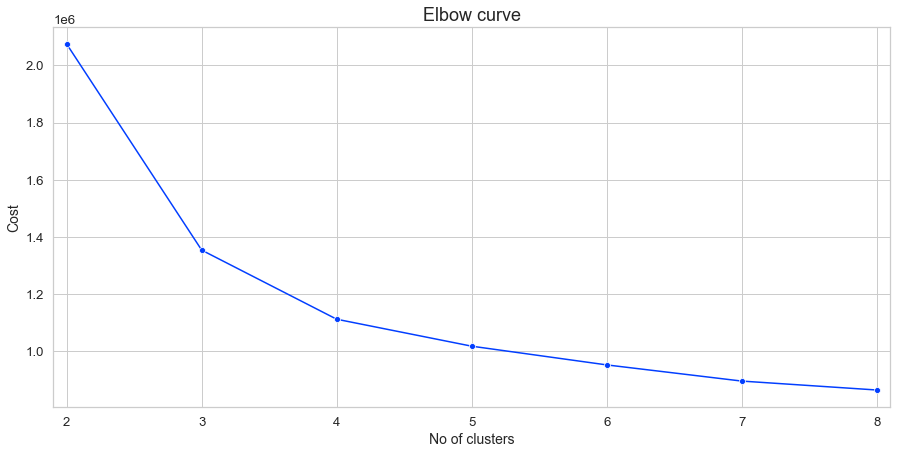

In [9]:

# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    
    for k in no_of_clusters:
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    
# Plotting elbow curve for k=2 to k=10
plot_elbow_curve(2,8,smart_array)